In [1]:
cd /tf/classifier

/tf/classifier


In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from core.data import create_dataset, load_records

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
metadata = pd.read_csv('./data/raw_data/ztf/dfcrossmatches_ZTF_prioritized_v8.0.1.csv')
metadata = metadata.replace({'EB/EW':'EB&EW', 'CV/Nova':'CV&Nova'})
metadata.sample(1)

,oid,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec
223244,ZTF18abpfkct,LPV,278.436645,-20.21158,NaN,GAIADR2VS,4.091975871599247e+18,MIRA_SR,0.113441


In [8]:
metadata['classALeRCE'].unique()

array(['CV&Nova', 'Blazar', 'AGN', 'QSO', 'NLQSO', 'NLAGN', 'YSO',
       'RSCVn', 'RRL', 'EB&EW', 'Periodic-Other', 'LPV', 'SNIa', 'SNIbc',
       'SNII', 'SNIIn', 'SNIIb', 'SLSN', 'EA', 'DSCT', 'Ceph', 'ZZ'],
      dtype=object)

In [10]:
stochastic = ['QSO','AGN', 'Blazar','CV&Nova','YSO']
periodic = ['LPV', 'EA', 'DSCT','RRL', 'Ceph', 'Periodic-Other']
transient = ['SNIa', 'SNIbc','SNII','SLSN']

In [11]:
metadata = metadata[metadata.classALeRCE.isin(stochastic+periodic+transient)]

In [27]:
class_names =list( metadata['classALeRCE'].unique())

In [14]:
create_dataset(metadata,
               source='./data/raw_data/ztf/detections_v8.csv',
               target='data/records/ztf',
               max_lcs_per_record=20000)

100%|██████████| 15/15 [09:51<00:00, 39.45s/it]


In [31]:
dataset = load_records('./data/records/ztf/train', batch_size=100, max_obs=100, repeat=5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int32), array([15, 14, 11,  9,  2,  6,  3,  7,  7,  4,  5,  4,  3,  3,  7]))


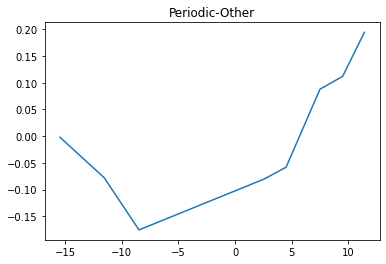

In [32]:
for batch in dataset:
    print(np.unique(batch['label'], return_counts=True))
    lc = tf.boolean_mask(batch['values'][0], batch['mask'][0][...,0])
    
    plt.plot(lc[:, 0], lc[:, 1])
    
    plt.title('{}'.format(class_names[batch['label'][0]]))
    break